In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D,Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [3]:
fake=pd.read_csv('Fake.csv')
real=pd.read_csv('True.csv')

<AxesSubplot:xlabel='subject', ylabel='count'>

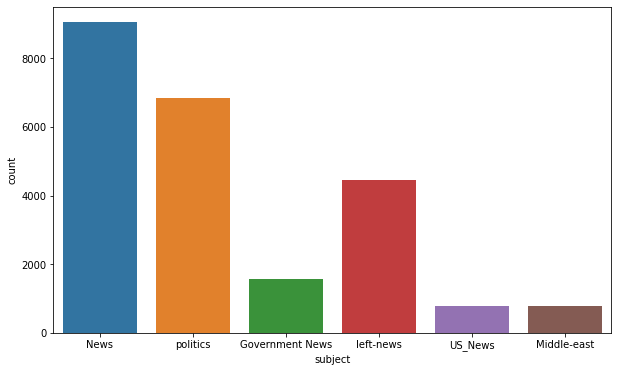

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

C:\Users\faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

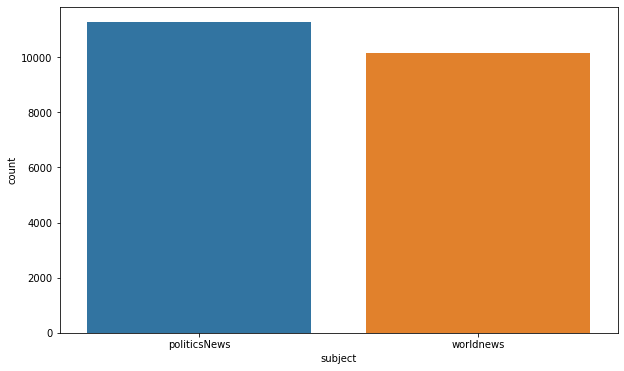

In [5]:
plt.figure(figsize=(10,6))
sns.countplot('subject',data=real)

In [6]:
text=' '.join(fake['text'].tolist())

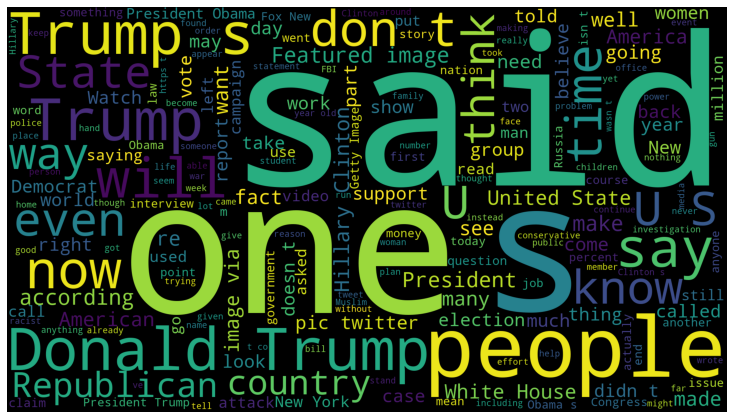

In [7]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [8]:
#exploring Real News

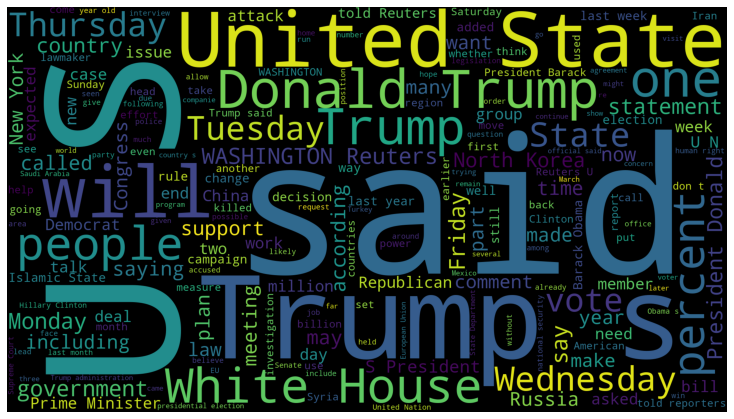

In [9]:
text=' '.join(real['text'].tolist())
wordcloud=WordCloud(width=1920,height=1080).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [10]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
    try:
        record=row.split(' - ',maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

In [11]:
len(unknown_publishers)

229

In [12]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 229, dtype: object

In [13]:
publisher= []
tmp_text= []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
    else:
        record=row.split(' - ',maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())

In [14]:
real['publisher']=publisher
real['text']=tmp_text

In [15]:
empty_fake_index=[index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]
fake.iloc[empty_fake_index]


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [16]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']

In [17]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

In [18]:
##preprocessing the dataset

In [19]:
real['class']=1
fake['class']=0

In [20]:
real=real[['text','class']]
fake=fake[['text','class']]

In [21]:
data=real.append(fake,ignore_index=True)#merging data
len(data)

C:\Users\faiza\AppData\Local\Temp\ipykernel_38676\1826422205.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=real.append(fake,ignore_index=True)#merging data


44898

In [22]:
label=data['class']
text=data['text']
len(label)

44898

In [23]:
import csv

In [24]:
with open('processed_data2.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(["text", "class"])
    for value in range(44898):
        writer.writerow([text[value],label[value]])

In [25]:
import preprocess_kgptalkie as ps


In [26]:
data['text'].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44893    mcpain john mccain furious that iran treated u...
44894    justice yahoo settles email privacy classactio...
44895    sunnistan us and allied safe zone plan to take...
44896    how to blow 700 million al jazeera america fin...
44897    10 us navy sailors held by iranian military si...
Name: text, Length: 44898, dtype: object

In [27]:

import gensim
y = data['class'].values 

In [28]:
X=[d.split() for d in data['text'].tolist()]

In [29]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,vector_size=100,window=10,min_count=1)

In [30]:
w2v_model.wv.most_similar('china')

[('beijing', 0.8985914587974548),
 ('taiwan', 0.8197522759437561),
 ('china’s', 0.7739953994750977),
 ('chinese', 0.717000424861908),
 ('china.', 0.7130936980247498),
 ('beijing’s', 0.6904846429824829),
 ('taiwan,', 0.688441276550293),
 ('china,', 0.6854705214500427),
 ('pyongyang', 0.6854097247123718),
 ('seoul', 0.6836555004119873)]

In [31]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [32]:
X=tokenizer.texts_to_sequences(X)

In [33]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'with': 13,
 'was': 14,
 'it': 15,
 'trump': 16,
 'as': 17,
 'his': 18,
 'by': 19,
 'said': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'from': 24,
 'not': 25,
 'at': 26,
 'are': 27,
 'this': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'but': 32,
 'would': 33,
 'we': 34,
 'i': 35,
 'about': 36,
 'u.s.': 37,
 'will': 38,
 'their': 39,
 'president': 40,
 'had': 41,
 'been': 42,
 'you': 43,
 't': 44,
 'were': 45,
 'or': 46,
 'after': 47,
 'which': 48,
 'more': 49,
 'she': 50,
 'people': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'what': 55,
 'when': 56,
 'new': 57,
 'out': 58,
 'all': 59,
 'its': 60,
 'also': 61,
 'over': 62,
 'donald': 63,
 'state': 64,
 'no': 65,
 'up': 66,
 'our': 67,
 'there': 68,
 'can': 69,
 'said.': 70,
 'just': 71,
 'than': 72,
 'house': 73,
 'other': 74,
 'some': 75,
 'could': 76,
 'republican': 77,
 'obama': 78,
 'into': 79,
 'told': 80,
 'united

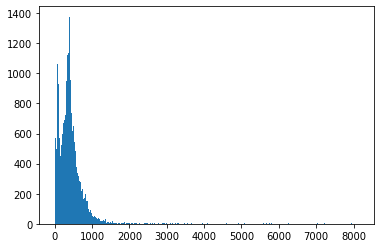

In [34]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [35]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1606

In [36]:
maxlen=1000 
X=pad_sequences(X,maxlen=maxlen)

In [37]:
len(X[101])

1000

In [38]:
vocab_size=len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [39]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    
    for word, i in vocab.items():
         weight_matrix[i]=model.wv[word]
    return weight_matrix

In [40]:
embedding_vectors=get_weight_matrix(w2v_model)

In [41]:
##LSTM###

In [42]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add (Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         37542900  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 37,660,277
Trainable params: 117,377
Non-trainable params: 37,542,900
_________________________________________________________________


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [45]:
model.fit(X_train,y_train,validation_split=0.3,epochs=1)

737/737 [==============================] - 1213s 2s/step - loss: 0.1345 - acc: 0.9499 - val_loss: 0.0872 - val_acc: 0.9703


In [46]:
y_pred=(model.predict(X_test)>=0.5).astype(int)

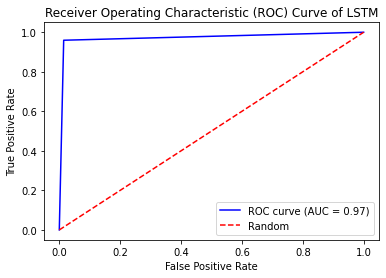

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics



# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)

# Calculate the AUC (Area Under the Curve)
auc = metrics.roc_auc_score(y_test,y_pred)

# Create the ROC plot
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of LSTM')
plt.savefig('Receiver Operating Characteristic (ROC) Curve of LSTM with Word2Vec.png')
plt.legend(loc='lower right')
plt.show()


In [48]:

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1 = f1_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("F1 score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("accuracy:", accuracy)

F1 score: 0.9714773050317445
Recall: 0.9595657057281917
Precision: 0.9836883515639993
accuracy: 0.973184855233853


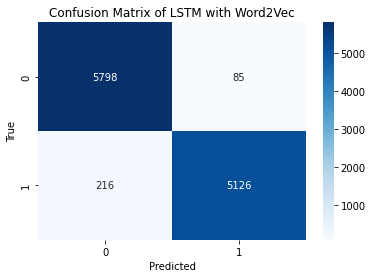

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix




# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of LSTM with Word2Vec')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'])
plt.savefig('Confusion Matrix of LSTM with Word2Vec.png')
# Display the plot
plt.show()

In [50]:
x=['']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

In [51]:
(model.predict(x)>=0.5).astype(int)

array([[0]])

In [52]:
#BI-LSTM#

In [53]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(Bidirectional(LSTM(units=128)))
model.add (Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         37542900  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 37,777,653
Trainable params: 234,753
Non-trainable params: 37,542,900
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,validation_split=0.3,epochs=1)

737/737 [==============================] - 2514s 3s/step - loss: 0.1308 - acc: 0.9522 - val_loss: 0.0596 - val_acc: 0.9817


In [56]:
y_pred=(model.predict(X_test)>=0.5).astype(int)

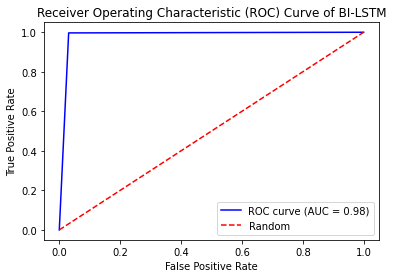

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics



# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)

# Calculate the AUC (Area Under the Curve)
auc = metrics.roc_auc_score(y_test,y_pred)

# Create the ROC plot
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of BI-LSTM')
plt.savefig('Receiver Operating Characteristic (ROC) Curve of BI-LSTM with Word2Vec.png')
plt.legend(loc='lower right')
plt.show()


In [58]:

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1 = f1_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("F1 score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("accuracy:", accuracy)

F1 score: 0.9816539135244768
Recall: 0.9966304754773493
Precision: 0.9671207992733878
accuracy: 0.982271714922049


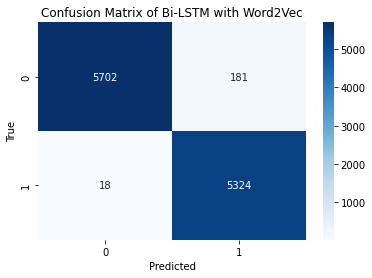

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix




# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Bi-LSTM with Word2Vec')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'])
plt.savefig('Confusion Matrix of Bi-LSTM with Word2Vec.jpg')
# Display the plot
plt.show()

In [60]:
x=['When Viktor Shevchenko was called forward to receive his medal from President Volodymyr Zelensky at a special ceremony in Kyiv earlier this year, his appearance seemed to come as a surprise to the Ukrainian leader.It was not the neck gaiter Shevchenko was wearing, pulled up to cover his nose and mouth, though that certainly made him stand out from the rest of the two dozen men present. Instead, it was his darker skin tone, dark brown eyes and jet-black hair.Are you really Viktor Shevchenko, or are you collecting a medal on behalf of someone else?” Zelensky asked.Shevchenko muttered his answer through the face scarf, but his voice was muffled, and the president failed to catch his reply.Shevchenko tried again a bit louder.This time, Zelensky understood.He was the right soldier, but Viktor Shevchenko was not his real name.Shevchenko laughed as he recalled the episode over lunch at a Crimean Tatar restaurant in Kyiv, and said the president was apologetic as soon as the penny dropped.He could see I was Tatar, that I wasn’t Slavic. I told him my parents are still in Crimea and he immediately understood,” he told us over a meal of traditional lamb chebureki, or fried turnovers seasoned with pepper, and dumplings.']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

In [61]:
(model.predict(x)>=0.5).astype(int)

array([[1]])